In [239]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

file_path = 'datasets/847_capstone.csv'

df = pd.read_csv(file_path, engine='python')


## Run the cell below to view data

In [240]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.head(n=20)

,screen_name,text,truncated
0,JohnBoozman,On a conference call about a weekend trip to Iraq to visit Arkansas troops,False
1,JohnBoozman,Being interviewed by KTHV,False
2,JohnBoozman,Being interviewed by KARN on his Arkansas World Trade Center trip,False
3,JohnBoozman,"On KWHN in Fort Smith, that's 1320 AM",False
4,JohnBoozman,Attending a Military of the Purple Heart Ceremony at the VA Medical Center in Fayetteville,False
5,JohnBoozman,Touring Helath South Hospital in Fayetteville,False
6,JohnBoozman,conducting a veterans affairs economic opportunity subcommittee field hearing at the northwest arkansas community college,False
7,JohnBoozman,doing an interview on kurm radio,False
8,JohnBoozman,"Meeting with Emergency Management officials from Johnson, Pope and Franklin counties",False
9,JohnBoozman,Listening to constituents at a roundtable discussion about gas prices in Flippin,False


In [241]:
df['truncated'].value_counts()

truncated
False    1243342
Name: count, dtype: int64

In [242]:
twitter_col = df['screen_name'].unique()
twitter_col

th_df = pd.DataFrame(twitter_col, columns=['twitter_col'])

path = "datasets/twitter_col.csv"
th_df.to_csv(path, index=False)

In [243]:
twitter_handles = []

RULER = len("http://t.co/xghfyYg3oC")
for i in twitter_col:
    i.strip()
    if len(i) < RULER and i[:4] != "http" and i != "---":
        twitter_handles.append(i)

len(twitter_handles)

549

## Check which individuals from the ```twitter_handlers``` are still in office

In [244]:
import requests

SOCIAL_MEDIA_URL = "https://theunitedstates.io/congress-legislators/legislators-social-media.json"
sm_response = requests.get(SOCIAL_MEDIA_URL)
social_result = sm_response.json()


In [245]:
info = []
handles = []

CURRENT_LEGISLATOR_URL = "https://theunitedstates.io/congress-legislators/legislators-current.json"
cl_response = requests.get(CURRENT_LEGISLATOR_URL)
cl_result = cl_response.json()

republican = 0
party_affiliation = {}

for i in social_result:

    if "twitter" in i["social"]:
        twitter_handle = i["social"]["twitter"]

        if twitter_handle in twitter_handles:
            bioguide = i["id"]["bioguide"]

            for j in cl_result:

                if j["id"]["bioguide"] == bioguide:

                    current_term = j["terms"][-1]
                    party = current_term["party"]

                    BIAS_LEVEL = 1  # libearl

                    if party == "Republican":
                        BIAS_LEVEL = 0  # conservative
                        republican = republican + 1

                    record = {
                        "twitter_handle": twitter_handle,
                        "bioguide": bioguide,
                        "bias_level": BIAS_LEVEL
                    }

                    party_affiliation[twitter_handle] = BIAS_LEVEL
                    
                    handles.append(twitter_handle)
                    info.append(record)

total = len(info)
democrats = total - republican
print(f"{total} people are in office")
print(f"Repulicans: {republican}")
print(f"Democrats: {democrats}")

222 people are in office
Repulicans: 107
Democrats: 115


## Merge the ```bias``` column into the Dataframe

In [246]:
# only keep the tweets from ppl who are still in Office
df = df[df['screen_name'].isin(handles)]

# create a separate column to put their party ids in there
df["bias"] = df['screen_name'].map(party_affiliation)

# save the file to local directory
file_path = "datasets/tweets_with_bias.csv"
df.to_csv(file_path, index=False)

df.head(n=20)

,screen_name,text,truncated,bias
0,JohnBoozman,On a conference call about a weekend trip to Iraq to visit Arkansas troops,False,0
1,JohnBoozman,Being interviewed by KTHV,False,0
2,JohnBoozman,Being interviewed by KARN on his Arkansas World Trade Center trip,False,0
3,JohnBoozman,"On KWHN in Fort Smith, that's 1320 AM",False,0
4,JohnBoozman,Attending a Military of the Purple Heart Ceremony at the VA Medical Center in Fayetteville,False,0
5,JohnBoozman,Touring Helath South Hospital in Fayetteville,False,0
6,JohnBoozman,conducting a veterans affairs economic opportunity subcommittee field hearing at the northwest arkansas community college,False,0
7,JohnBoozman,doing an interview on kurm radio,False,0
8,JohnBoozman,"Meeting with Emergency Management officials from Johnson, Pope and Franklin counties",False,0
9,JohnBoozman,Listening to constituents at a roundtable discussion about gas prices in Flippin,False,0


In [247]:
len(df)
print(f"This datasets has {len(df)} instances.")

This datasets has 507895 instances.


In [248]:
df = df.drop(["screen_name", "truncated"], axis=1)

In [249]:
df.head(n=10)

,text,bias
0,On a conference call about a weekend trip to Iraq to visit Arkansas troops,0
1,Being interviewed by KTHV,0
2,Being interviewed by KARN on his Arkansas World Trade Center trip,0
3,"On KWHN in Fort Smith, that's 1320 AM",0
4,Attending a Military of the Purple Heart Ceremony at the VA Medical Center in Fayetteville,0
5,Touring Helath South Hospital in Fayetteville,0
6,conducting a veterans affairs economic opportunity subcommittee field hearing at the northwest arkansas community college,0
7,doing an interview on kurm radio,0
8,"Meeting with Emergency Management officials from Johnson, Pope and Franklin counties",0
9,Listening to constituents at a roundtable discussion about gas prices in Flippin,0


In [250]:
# split the df into training, validation, and testing
train_df, sub_df = train_test_split(df, test_size=0.3, random_state=42)
valid_df, test_df = train_test_split(sub_df, test_size=0.3, random_state=42)

In [251]:
train_df.head(n=10)
print(f"training dataset has {len(train_df)} instances in it.")
print(f"validation dataset has {len(valid_df)} instances in it.")
print(f"testing dataset has {len(test_df)} instances in it.")


training dataset has 355526 instances in it.
validation dataset has 106658 instances in it.
testing dataset has 45711 instances in it.


## EDA and Determine appropriate text length for model fine-tuning

In [252]:
# Imbalance inspection BEFORE EDA

# Democrats
df_liberal = train_df[train_df["bias"]==1]["text"]
df_liberal.head(n=10)

# Republicans
df_conservative = train_df[train_df["bias"]==0]["text"]
df_conservative.head(n=10)

print(len(df_conservative))
print(len(df_liberal))

155641
199885


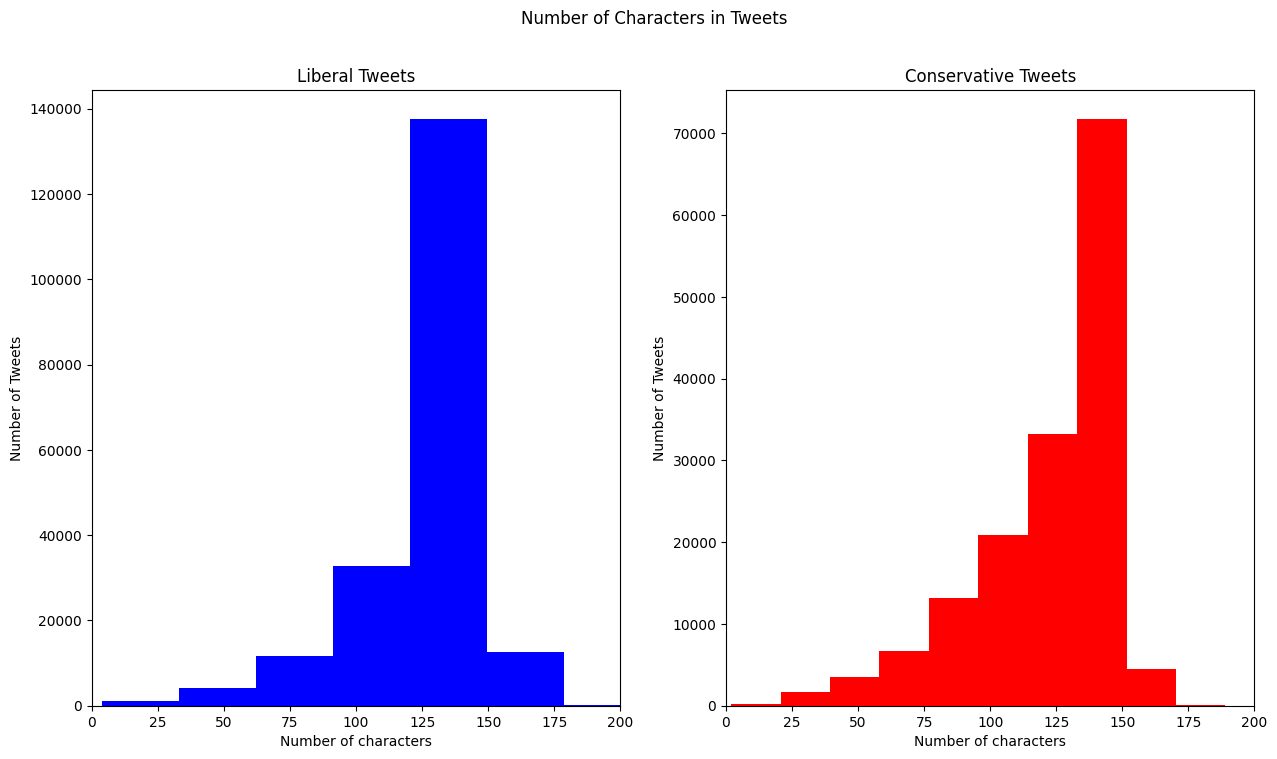

In [253]:
import matplotlib.pyplot as plt

figure,(lib_ax, con_ax)=plt.subplots(1, 2, figsize=(15, 8))
lib_ax.hist(df_liberal.str.len(), color="blue")
lib_ax.set_title('Liberal Tweets')
lib_ax.set_xlabel("Number of characters")
lib_ax.set_ylabel("Number of Tweets")
lib_ax.set_xlim(0, 200)

con_ax.hist(df_conservative.str.len(), color="red")
con_ax.set_title('Conservative Tweets')
con_ax.set_xlabel("Number of characters")
con_ax.set_ylabel("Number of Tweets")
con_ax.set_xlim(0, 200)

figure.suptitle('Number of Characters in Tweets')
plt.show()

In [254]:
# select tweets are 100 - 150 characters long
train_df = train_df[train_df["text"].str.len() < 50]
# train_df = train_df[train_df["text"].str.len() < 175]

In [255]:
# Imbalance inspection AFTER EDA

# Democrats
df_liberal = train_df[train_df["bias"]==1]["text"]
df_liberal.head(n=10)

# Republicans
df_conservative = train_df[train_df["bias"]==0]["text"]
df_conservative.head(n=10)

# imbalance inspection AFTER EDA
print(len(df_conservative))
print(len(df_liberal))

28861
23107


## Data Preprocessing

In [256]:
import re

X_train = train_df["text"]
y_train = train_df["bias"]

X_val = valid_df["text"]
y_val = valid_df["bias"]

# Remove punctuations
X_train = X_train.str.replace(r'[^\w\s]', '', regex=True)
X_val = X_val.str.replace(r'[^\w\s]', '', regex=True)

# Remove numbers
X_train = X_train.str.replace(r'\d+', '', regex=True)
X_val = X_val.str.replace(r'\d+', '', regex=True)

# Remove special characters
def remove_special_characters(text):
    # Use re.sub() to replace any character that is not a word character (alphanumeric or underscore) or whitespace with an empty string
    cleaned_text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    return cleaned_text

X_train = X_train.apply(remove_special_characters)
X_val = X_val.apply(remove_special_characters)

In [258]:
X_train.head(n=10)

1187878                            Thanks RepSires Honored to have your friendship httpstcooxDGlKBvT
1028225                                                                      This gt httpstcoOFIFBEv
54214      Happening Now Followup press conference on the Congressional trip to AL on immigration HB
707612                 Im hosting a live telephone town hall right now If youd like to join you can 
437716      tjomac Stay engaged and I would encourage each of you to submit your comments to the ATF
963363                 Military Warns Chinese Computer Gear Poses Cyber Spy Threat httpstcoGwuYqbNwW
189590                                                   min UNI VB home season v Iowa st will start
1091856             In just a few minutes Ill be talking border security with FoxNews  tune in at CT
916243                                                         Thanks for having me httpstcoZnZcleFP
1026156                   My statement on todays sentencing in Charleston Emanuel httpstcow

In [259]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

def basic_preprocessor(text):
    
    text.lower() # case normalization
    tokenized_text = text.split() # tokenization
    
    # lemmentization
    lemmer = WordNetLemmatizer()
    lemmentized_text = []
    for i in range(0, len(tokenized_text)):
        curr_token = tokenized_text[i]
        lemmentized_token = lemmer.lemmatize(curr_token)
        lemmentized_text.append(lemmentized_token)
    tokenized_text = ' '.join(tokenized_text).strip()
    return tokenized_text

# lemmenitize the text
X_train = X_train.apply(basic_preprocessor)
X_val = X_val.apply(basic_preprocessor)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhuoxiangxie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [260]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_val = ohe.fit_transform(np.array(y_val).reshape(-1, 1)).toarray()

## Importing ```bert-base-uncased``` model from Hugging Face and fine-tune it

In [261]:
from transformers import BertTokenizerFast
from transformers import TFBertModel
import tensorflow as tf

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [262]:
MAX_LEN=128

# tokenize the dataset
def text_tokenizer(data, max_len=MAX_LEN):
    encoded = tokenizer.encode_plus(
        data,
        max_length=max_len,
        add_special_tokens=True, 
        padding='max_length',
        return_attention_mask=True
    )
    return encoded

X_train_new = X_train.apply(text_tokenizer)

# obtaine input_ids and attention_masks for text data
train_input_ids = []
train_attention_masks = []
for i in range(len(X_train)):
    train_input_ids.append(X_train_new.iloc[i]['input_ids'])
    train_attention_masks.append(X_train_new.iloc[i]['attention_mask'])
    
train_input_ids_np = np.array(train_input_ids)
train_attention_masks_np = np.array(train_attention_masks)

X_val_new = X_val.apply(text_tokenizer)
val_input_ids = []
val_attention_masks = []
for i in range(len(X_val)):
    val_input_ids.append(X_val_new.iloc[i]['input_ids'])
    val_attention_masks.append(X_val_new.iloc[i]['attention_mask'])
    
val_input_ids_np = np.array(val_input_ids)
val_attention_masks_np = np.array(val_attention_masks)

In [263]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [264]:
def create_model(bert_model, max_len=MAX_LEN):

    opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')
    embeddings = bert_model([input_ids, attention_masks])[1]
    output = tf.keras.layers.Dense(2, activation="softmax")(embeddings)
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)
    model.compile(opt, loss=loss, metrics=accuracy)
    
    return model

# customize the imported "bert-base-uncased" model and initiate it
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model_4 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_9[0][0]',             
 el)                         ngAndCrossAttentions(last_   40         'input_10[0][0]']            
                             hidden_state=(None, 128, 7                                           
                             68),                                                           

In [ ]:
history_bert = model.fit(
    [train_input_ids_np, train_attention_masks_np],
    y_train, 
    validation_data=([val_input_ids_np, val_attention_masks_np], y_val), 
    epochs=4, 
    batch_size=32
)